In [1]:
import json
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from glob import glob
from random import sample
import os

In [2]:
with open("/media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/trainval/annotations/bbox-annotations.json", 'r') as file:
    data = json.load(file)

In [3]:
data.keys()

dict_keys(['images', 'annotations', 'categories', 'licenses'])

In [4]:
print(len(data['images']))
print(len(data['annotations']))
print(len(data['categories']))


2239
16772
2


In [5]:
data['images'][100]

{'file_name': 'image_000000101.jpg',
 'width': 1024,
 'height': 683,
 'id': 100,
 'license': 1}

In [6]:
imagesData = {}

for img in data['images']:
    temp_key = img['id'] #
    imagesData[temp_key] = {"filename" : img['file_name'] , "width":img['width'] , "height":img['height']}

In [9]:
imagesData[100]

{'filename': 'image_000000101.jpg', 'width': 1024, 'height': 683}

In [11]:
data['annotations'][50]

{'category_id': 2,
 'image_id': 9,
 'segmentation': [],
 'iscrowd': 0,
 'bbox': [627, 235, 322, 159],
 'area': 0.07320358254026355,
 'id': 50,
 'license': 2}

In [14]:
full_annot_data = {}

for annot in data['annotations']: # iterating the list
    curr_img_id = annot['image_id']
    current_category = annot['category_id']
    xmin,ymin,width,height = annot['bbox'] 
    final_bbox = [xmin, ymin, xmin+width, ymin+height]
    
    if curr_img_id not in list(full_annot_data.keys()):
        full_annot_data[curr_img_id] = []
        full_annot_data[curr_img_id].append({'category':current_category ,
                                             'bbox':final_bbox , 
                                             'name': imagesData[curr_img_id]['filename'],
                                             'height': imagesData[curr_img_id]['height'],
                                             'width': imagesData[curr_img_id]['width']
                                            })
    else:
        full_annot_data[curr_img_id].append({'category':current_category ,
                                             'bbox':final_bbox , 
                                             'name': imagesData[curr_img_id]['filename'],
                                             'height': imagesData[curr_img_id]['height'],
                                             'width': imagesData[curr_img_id]['width']
                                            })

In [15]:
full_annot_data

{0: [{'category': 1,
   'bbox': [846, 145, 992, 622],
   'name': 'image_000000001.jpg',
   'height': 768,
   'width': 1024},
  {'category': 1,
   'bbox': [848, 216, 1023, 767],
   'name': 'image_000000001.jpg',
   'height': 768,
   'width': 1024},
  {'category': 2,
   'bbox': [74, 159, 149, 240],
   'name': 'image_000000001.jpg',
   'height': 768,
   'width': 1024},
  {'category': 2,
   'bbox': [153, 124, 811, 767],
   'name': 'image_000000001.jpg',
   'height': 768,
   'width': 1024}],
 1: [{'category': 1,
   'bbox': [488, 281, 516, 352],
   'name': 'image_000000002.jpg',
   'height': 576,
   'width': 1024},
  {'category': 2,
   'bbox': [26, 283, 171, 358],
   'name': 'image_000000002.jpg',
   'height': 576,
   'width': 1024},
  {'category': 2,
   'bbox': [592, 287, 713, 386],
   'name': 'image_000000002.jpg',
   'height': 576,
   'width': 1024}],
 2: [{'category': 1,
   'bbox': [8, 0, 88, 609],
   'name': 'image_000000003.jpg',
   'height': 683,
   'width': 1024},
  {'category': 1,
 

In [16]:
data['categories']

[{'id': 1, 'name': 'person', 'supercategory': 'none'},
 {'id': 2, 'name': 'car', 'supercategory': 'none'}]

In [17]:
labels = {1:"person" , 2:"car"}

In [20]:
train_path = r"/media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/train-images/*"
train_file_names = glob(train_path)
train_file_names = [t.split(r"/")[-1] for t in train_file_names]


test_path = r"/media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/test-images/*"
test_file_names = glob(test_path)
test_file_names = [t.split(r"/")[-1] for t in test_file_names]


In [22]:
with open("data/train.csv" , 'w') as file:
    file.write(f"filename,width,height,class,xmin,ymin,xmax,ymax\n")
    for k,v in full_annot_data.items():
        for temp_dict in v:
            temp_cat = temp_dict['category']
            temp_class = labels[temp_cat]
            bbox = temp_dict['bbox']
            height = temp_dict['height']
            width = temp_dict['width']
            x1,y1,x2,y2 = bbox
            name = temp_dict['name']
            
            if name in train_file_names:
                file.write(f"{name},{width},{height},{temp_class},{x1},{y1},{x2},{y2}\n")
    

In [23]:
with open("data/test.csv" , 'w') as file:
    file.write(f"filename,width,height,class,xmin,ymin,xmax,ymax\n")
    for k,v in full_annot_data.items():
        for temp_dict in v:
            temp_cat = temp_dict['category']
            temp_class = labels[temp_cat]
            bbox = temp_dict['bbox']
            height = temp_dict['height']
            width = temp_dict['width']
            x1,y1,x2,y2 = bbox
            name = temp_dict['name']
            
            if name in test_file_names:
                file.write(f"{name},{width},{height},{temp_class},{x1},{y1},{x2},{y2}\n")
    

## Test the annots

In [29]:
import cv2
import pandas as pd
import random

In [25]:
train_annots = pd.read_csv("data/train.csv")

In [51]:
test_annots = pd.read_csv("data/test.csv")

In [52]:
train_annots.head()

filename  width  height   class  xmin  ymin  xmax  ymax
0  image_000000001.jpg   1024     768  person   846   145   992   622
1  image_000000001.jpg   1024     768  person   848   216  1023   767
2  image_000000001.jpg   1024     768     car    74   159   149   240
3  image_000000001.jpg   1024     768     car   153   124   811   767
4  image_000000003.jpg   1024     683  person     8     0    88   609

In [27]:
train_file_names[2]

'image_000000573.jpg'

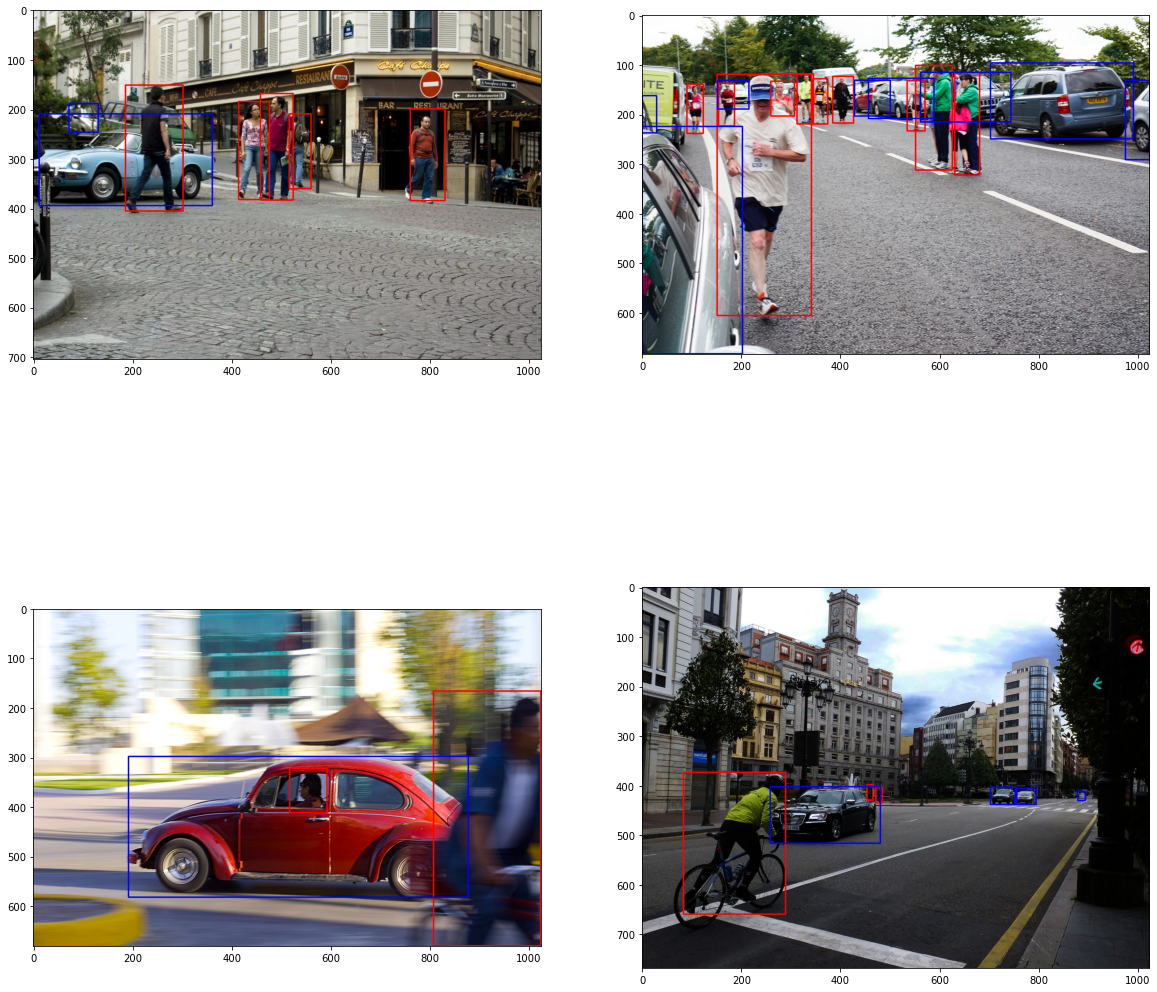

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(20,20))  # now we have a 2x2 matrix

for row in range(2):
    for col in range(2):
        temp_file = train_file_names[random.randint(0, len(train_file_names)-1)]
        sampleData = train_annots[train_annots.filename == temp_file]
        image = cv2.imread(train_path.split("*")[0] + f"/{temp_file}")
        image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
        for i in range(len(sampleData)):
            details = sampleData.iloc[i]
            if details[3] == "person":
                image = cv2.rectangle(image, (details[4],details[5]) , (details[6],details[7]), (255,0,0),2 )
            else:
                image = cv2.rectangle(image, (details[4],details[5]) , (details[6],details[7]), (0,0,255), 2 )


        axes[row][col].imshow(image)


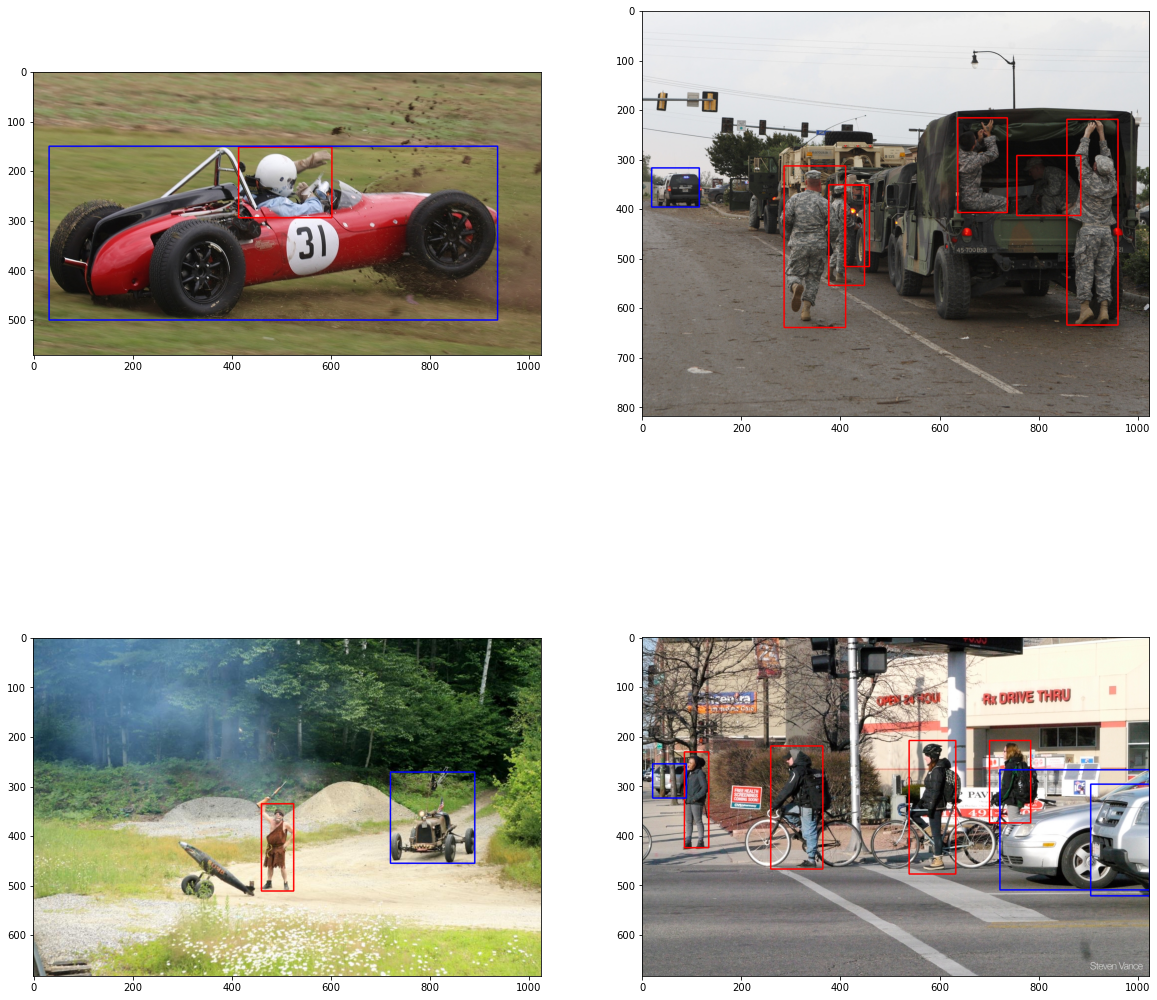

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(20,20))  # now we have a 2x2 matrix

for row in range(2):
    for col in range(2):
        temp_file = test_file_names[random.randint(0, len(test_file_names)-1)]
        sampleData = test_annots[test_annots.filename == temp_file]
        image = cv2.imread(test_path.split("*")[0] + f"/{temp_file}")
        image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
        for i in range(len(sampleData)):
            details = sampleData.iloc[i]
            if details[3] == "person":
                image = cv2.rectangle(image, (details[4],details[5]) , (details[6],details[7]), (255,0,0),2 )
            else:
                image = cv2.rectangle(image, (details[4],details[5]) , (details[6],details[7]), (0,0,255), 2 )


        axes[row][col].imshow(image)


## Generate TF Records

--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------

python generate_tfrecords.py --path_to_image /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/train-images --path_to_annot /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/train.csv --path_to_label_map /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/labelmap.pbtxt --path_to_save_tfrecords /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/train.record


--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------

python generate_tfrecords.py --path_to_image /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/test-images --path_to_annot /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/test.csv --path_to_label_map /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/labelmap.pbtxt --path_to_save_tfrecords /media/heisenberg/Storage/AllCodesSectionwise/Z-MISC-PROJECTS/EagleView/code-repo/data/test.record
